# Chapter 2 - A First Example

In [1]:
# Imports
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2025-04-18 18:06:37.486007: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 18:06:37.541088: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 18:06:37.605924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745017597.662655  199927 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745017597.680246  199927 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745017597.803609  199927 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Look at training data
display(train_images.shape)

display(len(train_labels))

display(train_labels)

(60000, 28, 28)

60000

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [3]:
# Look at test data
display(test_images.shape)

display(len(test_labels))

display(test_labels)

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [4]:
# Create a model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])

display(model)

/home/jonathan/Projects/deep_learning_with_python/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-18 18:06:43.021566: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<Sequential name=sequential, built=True>

In [5]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

display(model)

<Sequential name=sequential, built=True>

In [6]:
# Reshape the image data for modeling
train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10_000, 28*28))
test_images = test_images.astype("float32")/255

display(train_images.shape)
display(test_images.shape)


(60000, 784)

(10000, 784)

In [7]:
# Fit the model

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8771 - loss: 0.4330
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9674 - loss: 0.1139
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9783 - loss: 0.0724
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9855 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0382


In [8]:
# Make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
display(predictions[0])
display(predictions[0].argmax())
display(predictions[0][1])
test_labels[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([1.8267828e-08, 5.7987055e-09, 1.1855009e-06, 3.3502554e-05,
       6.0974080e-11, 2.2045757e-08, 1.1927589e-13, 9.9996036e-01,
       1.7286705e-07, 4.6799905e-06], dtype=float32)

np.int64(7)

np.float32(5.7987055e-09)

np.uint8(7)

In [9]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0774
test_acc: 0.9789999723434448


## Data representations with Tensors

In [10]:
# Rank 0 tensor
import numpy as np 
x = np.array(12)
display(x)
display(x.ndim)

array(12)

0

In [11]:
# Rank 1 Tensor
x = np.array([12,3,6,14,7])
display(x)
display(x.ndim)

array([12,  3,  6, 14,  7])

1

In [12]:
# Rank 2 Tensor
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1]])
display(x)
display(x.ndim)

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1]])

2

In deep learning you will typically manipulate tensors with dimension 0 to 4, but you may
on occasion go to 5 if you are working with video data.

Tensors are defined by:

- Number of axes (ie rank)
- Shape (describes the dimensions)
- Data type (float16, float32)



In [13]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images.ndim

3

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images.dtype

dtype('uint8')

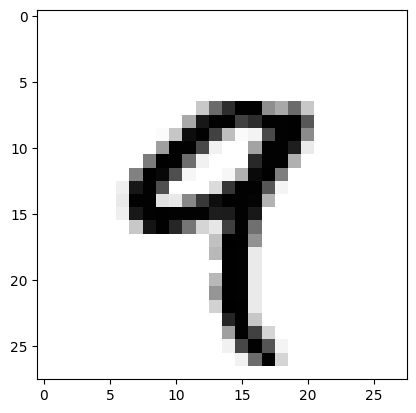

np.uint8(9)

In [17]:
import matplotlib.pyplot as plt 
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

display(train_labels[4])

### Manipulating Tensors in Numpy

In [18]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [19]:
my_slice = train_images[10:100, :, :]
display(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
display(my_slice.shape)

(90, 28, 28)

(90, 28, 28)

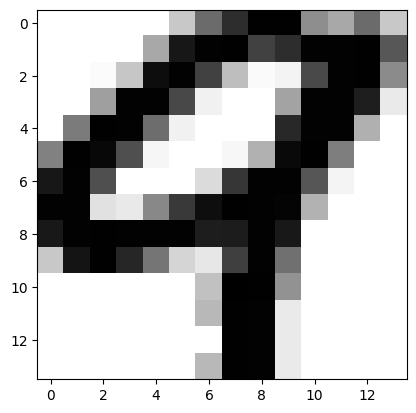

In [20]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[4], cmap=plt.cm.binary)
my_slice = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice[4], cmap=plt.cm.binary)

 You can see that you can use these operations to essentially crop the in images
 etc.

 ### Notion of data batches

 - The first axis will generally be the samples axis
 - In the example above the samples are images
 - The dataset is rarely processsed all at once
 - It is typically processed in batches
 - In our case the batch size is 128

In [21]:
batch0 = train_images[:128]
batch1 = train_images[128:256]

n = 3
batchn = train_images[128*n:128*(n+1)]

## Real world examples of tensors

- Vector (tabular) Data: Rank 2, (samples, features), where each sample is a vector
  of numerical attributes
- Time Series: Rank 3, (samples, timesteps, features)
- Images: Rank 4, (samples, height, width, channels), each pixes is representated by a vector
  of values
- Video: Rank 5, (samples, frames, heights, width, channels), where each sample is a sequence of frames

## The gears of neural networks: Tensor operations

In [22]:
import keras

### A Dense layer

```python
keras.layers.Dense(512, activation='relu')
```

- This is a function that takes an input matrix and returns another matrix

```python
output = relu(dot(input, W) + b)
```
There are three tensor operations here

- a dot product
- tensor addition
- a relu operation, $max(x, 0)$.

#### Elementwise Operations

Note the $relu$ and $+$ are elementwise operations, while the dot is a matrix operation

- There is elementwise addition, subtraction, multiplication, ...

#### Dot Products

Same as in matrix algebra

#### Tensor reshaping

The operation of reshaping a matrix/tensor

In [23]:
train_images = train_images.reshape((60_000, 28*28))
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
display(x.shape)

x = x.reshape((6,1))
display(x)
display(x.shape)

x = x.reshape((2,3))
display(x)
display(x.shape)

(3, 2)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

(6, 1)

array([[0., 1., 2.],
       [3., 4., 5.]])

(2, 3)

#### Transposition

This just transposes the matrix/tensor

In [24]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric Interpretations of tensor operations

- Tensor addition acts like a translation of an object to a new position, without
  distoring the object

$$
\begin{bmatrix}HorizontalFactor \\
               VerticalFactor
\end{bmatrix} + 
\begin{bmatrix}x \\
               y
\end{bmatrix}
$$

- Rotation (counterclockwise): a dot product with 
$$R = \begin{bmatrix}cos(\theta) & -sin(\theta) \\
                     sin(\theta) & cos(\theta)
      \end{bmatrix} \cdot 
      \begin{bmatrix}x \\
                     y
      \end{bmatrix}
$$

- Scaling: Vertical and horizontal scaling can be achieve with a diagonal matrix

$$
S = \begin{bmatrix}
    HorizontalFactor & 0 \\
    0 & VerticalFactor
    \end{bmatrix} \cdot 
    \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
$$

- Linear Transform: A dot product with an arbitrary matrix. This encompasses scaling
  and rotation
- Affine transform: The combination of a linear transform and a translation. Note
  $y = W \cdot x + b$ is affine. Note that an affine transform of an affine transform
  is an affine transform. This means that neural networks w/o activation functions
  would just be linear models in disguise.
  

## Stochastic Gradient Descent - Front Pass

- SGD is the method of minimizing the loss function
- It essentially evaluates the partial derivative for all dimensions (weights)
  and then moves in the opposite direction related to the learning rate to minimize the
  loss function
- There are many different version of SGD, or optimizers
- A common enhancement to vanilla SGD is to add the concept of momentum.
  Adagrad, RMSprop, and others
- Momentum aids in convergence speed and helps avoid local minima.

## Backpropagation and the Chain Rule

- Tensor operations have simple derivatives, allowing them to be chained together
- Computation graphs can be used to program extensive chained operations
- Computation graphs let you encode commputable expressions as a machine readable data
  structure
- Reversing computation graphs and using gradients allow for the creation of the
  back pass.

## The Gradient Tape

GradientTape is a python scope that will "record" the tensor operations that
run inside as a computation graph, or "tape".

In [25]:
import tensorflow as tf 
x = tf.Variable(0.)

display(x)

with tf.GradientTape() as tape:
    y = 2 * x + 3
    
grad_of_y_wrt = tape.gradient(y, x)
display(grad_of_y_wrt)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [26]:
x = tf.Variable(tf.random.uniform((2,2)))

display(x)

with tf.GradientTape() as tape:
    y = 2 * x + 3

grad_of_y_wrt_x = tape.gradient(y, x)
display(grad_of_y_wrt_x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.22418666, 0.885672  ],
       [0.5892997 , 0.23987722]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [27]:
# It works on lists of variables

W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros(2,))
x = tf.random.uniform((2,2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
    
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

display(grad_of_y_wrt_W_and_b)

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.2108225, 1.2108225],
        [1.373268 , 1.373268 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## A short review of the first example

In [28]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

- Here you transform data into several tensors
- Each pixel in the image represents an input feature and there are 512 of them

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

- Above you see you have a layer with the activation function relu
- Each layer is applying tensor functions
- The weights that are calibrated hold the knowledge

In [30]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- We have specified the loss function and the optimizer that will be used
  for the optimizer
- We have also specified metrics to track

In [31]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8735 - loss: 0.4406
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9666 - loss: 0.1152
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9794 - loss: 0.0698
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9850 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9894 - loss: 0.0366


- the model iterates on batches of 128 images
- It does 5 passes or epochs
- Ir performs 2,345 gradient updates

## Reimplementing the first example from scratch with Tensorflow

- Here we will barely using any keras functions

In [32]:
# The dense layer
import tensorflow as tf 

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
    
    @property
    def weights(self):
        return [self.W, self.b]
        
    

In [33]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
        
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [34]:
model = NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.relu),
    
])

assert len(model.weights) == 4

In [35]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images =images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images)/batch_size)
        
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels
    
    

In [36]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [37]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [38]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [39]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10_000, 28*28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 1
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 2
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 3
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 4
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 5
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 6
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 400: 2.30
Epoch 7
loss at batch 0: 2.30
loss at batch 100: 2.30
loss at batch 200: 2.30
loss at batch 300: 2.30
loss at batch 40

In [40]:
# Evaluating the Model
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.10


# Chapter 3 - Intro to Keras and Tensorflow

## First steps with Tensorflow

In [41]:
# All ones or zeroes
import tensorflow as tf
x = tf.ones(shape=(2,1))
display(x)

x = tf.zeros(shape=(2,1))
display(x)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [42]:
# Random Tensors
x = tf.random.normal(shape=(3,1), mean=0, stddev=1.)
display(x)

x = tf.random.uniform(shape=(3,1), minval=0, maxval=1.)
display(x)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 2.0407846 ],
       [ 0.77095276],
       [-1.0165957 ]], dtype=float32)>

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.20605576],
       [0.11481476],
       [0.9792299 ]], dtype=float32)>

- Numpy arrays are assignable
- Tensors are not

In [43]:
# Tensor variables
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
display(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.97208273],
       [0.9767714 ],
       [0.4732246 ]], dtype=float32)>

In [44]:
# Assigning values to a Tensorflow Variable
v.assign(tf.ones((3,1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [45]:
# You can assign to a subset
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [46]:
# Assign Add
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [47]:
# Assign subtract
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [48]:
# Tensor Math
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c 
e = tf.matmul(a, b)
e *= d

display(a)
display(b)
display(c)
display(d)
display(e)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

## Gradient Tape API

In [49]:
# Gradient with a Variable
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

In [50]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [51]:
# Gradient with a Constant
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(result, input_const)
    
gradient = tape.gradient(result, input_const)

In [52]:
# Second order gradient
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

## An End to End Example: A Linear Classifier

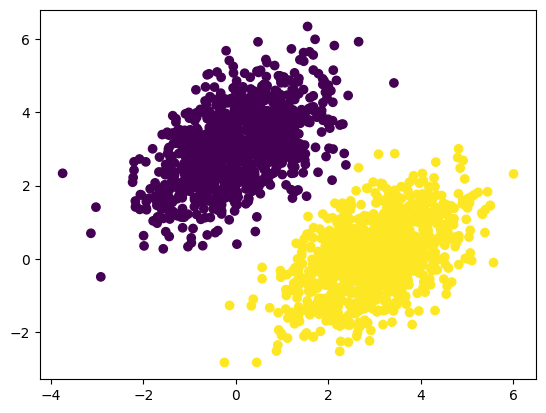

In [53]:
# Create the data
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], 
                                                 cov=[[1, 0.5],[0.5, 1]],
                                                 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], 
                                                 cov=[[1, 0.5],[0.5, 1]],
                                                 size=num_samples_per_class)

# Stack the data
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generate the targets
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

# Plot the data
import matplotlib.pyplot as plt 
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show()

In [54]:
# Create the linear classifier
input_dim = 2               # 2d input points
output_dim = 1              # One score per sample (0 or 1)

# Create W, b
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

# Create the forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

# Define the loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

# Define the training step
def training_step(inputs, targets):
    
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    return loss

Here we do just batch trainoing instead of mini batch

In [55]:
# The batch training loop
for step in range(100):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.9014
Loss at step 1: 0.4626
Loss at step 2: 0.1637
Loss at step 3: 0.1178
Loss at step 4: 0.1055
Loss at step 5: 0.0982
Loss at step 6: 0.0919
Loss at step 7: 0.0863
Loss at step 8: 0.0811
Loss at step 9: 0.0763
Loss at step 10: 0.0720
Loss at step 11: 0.0680
Loss at step 12: 0.0643
Loss at step 13: 0.0610
Loss at step 14: 0.0579
Loss at step 15: 0.0551
Loss at step 16: 0.0525
Loss at step 17: 0.0501
Loss at step 18: 0.0479
Loss at step 19: 0.0459
Loss at step 20: 0.0441
Loss at step 21: 0.0424
Loss at step 22: 0.0408
Loss at step 23: 0.0394
Loss at step 24: 0.0381
Loss at step 25: 0.0369
Loss at step 26: 0.0358
Loss at step 27: 0.0348
Loss at step 28: 0.0339
Loss at step 29: 0.0331
Loss at step 30: 0.0323
Loss at step 31: 0.0316
Loss at step 32: 0.0309
Loss at step 33: 0.0303
Loss at step 34: 0.0298
Loss at step 35: 0.0293
Loss at step 36: 0.0288
Loss at step 37: 0.0284
Loss at step 38: 0.0280
Loss at step 39: 0.0276
Loss at step 40: 0.0273
Loss at step 41: 0.0270
Lo

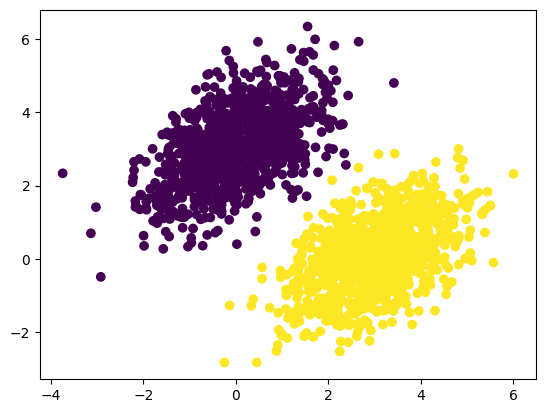

In [56]:
# Plot the results
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

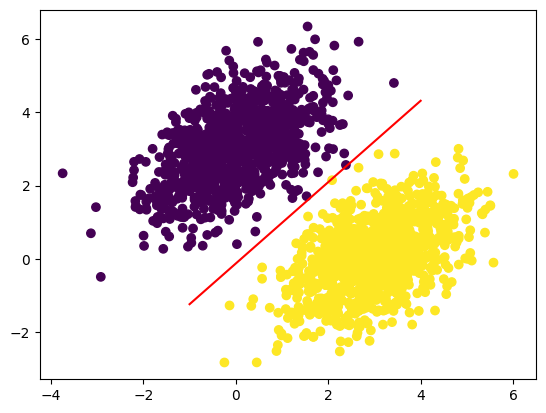

In [57]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a Neural Network

### Layers

Layers are data processing modules that take as input one or more tensors and that
output one or more tensors. Some layers are stateless, but more frequently layers
have a state, the weights.

There are different types of layers

- Dense: often used for (sample, features), rank 2, ie tabular data
- Recurrent layers: Time series, (samples, timesteps, features),
  LSTM layers, or 1D convolution (Conv1D)). Image data, rank 4 tensors are
  processed by Conv2D.

Layers are the building blocks of deep learning

#### The Base Layer

The `Layer` class is what other layers inherit from. It captures a state and 
some computation. The weights are defined in a `build()` constructor. The computation
is in the `call()` method.

##### Implementing a custom layer

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):                                          # 1
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):                                               # 2
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),                 # 3
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
        
    def call(self, inputs):                                                     # 4
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return(y)

1. All Keras Layers inherit from `Layer`
2. Weight creation happens in `build()`
3. add_weight() is a shortcut method for creating weights. It can also be done by
   creating standalone variables and assign them as layer attributes, like
   `self.W = tf.Variable(tf.random.uniform(w_shape))
4. We define the forward pass computation in the `call()`